In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score, normalized_mutual_info_score, homogeneity_completeness_v_measure

from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
iris = load_iris()
X, y = pd.DataFrame(iris.data, columns=iris.feature_names), iris.target
X, y

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0,

In [3]:
def preprocess(df):
    df = df.copy(deep=True)
    return pd.DataFrame(StandardScaler().fit_transform(df), index=df.index, columns=df.columns)

X = preprocess(X)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


[How to cut the tree for k?](https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn/)

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [14.375, 14.375, 71.25, 71.25],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [142.5, 142.5, 180.0, 180.0],
  [112.5, 112.5, 161.25, 161.25],
  [42.8125, 42.8125, 136.875, 136.875],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [213.75, 213.75, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0,

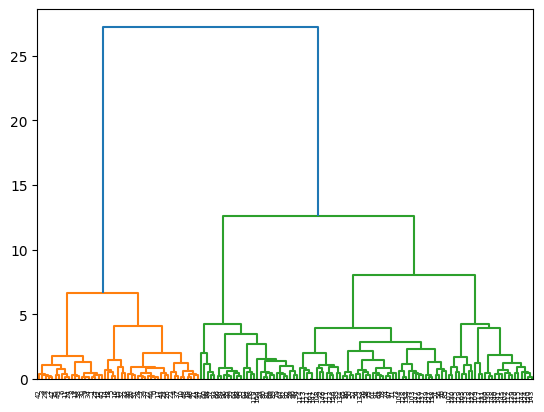

In [4]:
dendrogram((linkage(X, method='ward')))

We cut the tree at about 20th level, giving us 2 clusters.

In [5]:
agglomerative = AgglomerativeClustering(n_clusters=2, distance_threshold=None).fit(X)
agglomerative.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

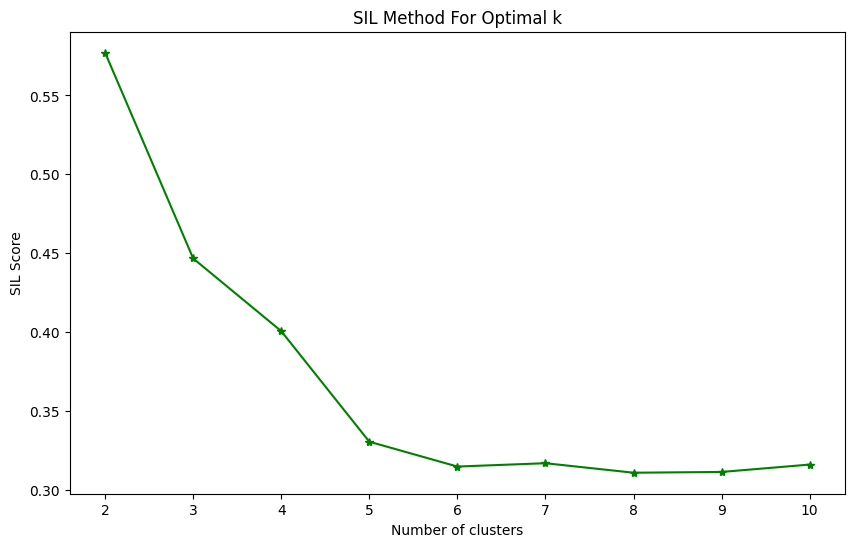

In [6]:
def calculate_sillhouette(df, kmax):
    sil = []
    for k in range(2, kmax+1):
        agg = AgglomerativeClustering(n_clusters=k, distance_threshold=None).fit(df)
        sil.append(silhouette_score(df, agg.labels_))
    return sil

plt.figure(figsize=(10,6))
plt.plot(range(2, 11), calculate_sillhouette(X, 10), 'g*-')
plt.xlabel('Number of clusters')
plt.ylabel('SIL Score')
plt.title('SIL Method For Optimal k')
plt.show()


We can see that **2** is the optimal value for `n_clusters` from the Silhouette score plot.

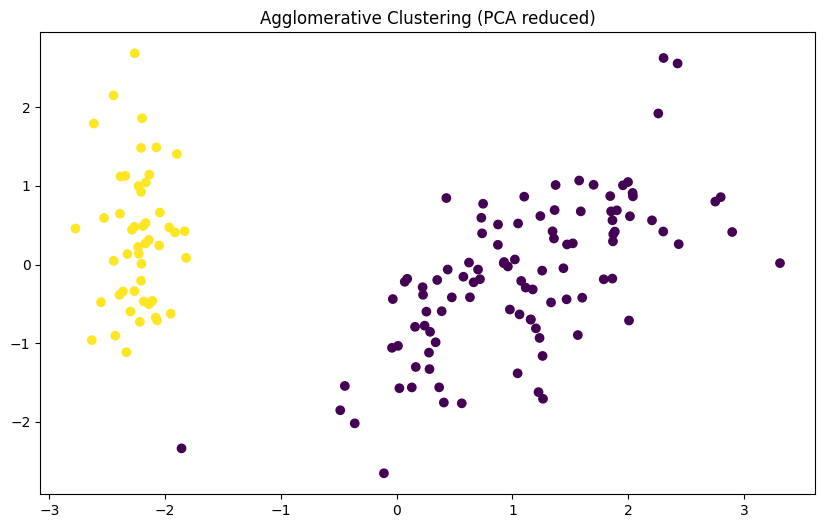

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=agglomerative.labels_)

plt.title('Agglomerative Clustering (PCA reduced)')
plt.show()

In [8]:
# Internal measures
print("Silhouette_score: ", silhouette_score(X, agglomerative.labels_))
print("Calinski_Harabasz_score", calinski_harabasz_score(X, agglomerative.labels_))
print("Davies_Bouldin_score", davies_bouldin_score(X, agglomerative.labels_))

# External measures
print("Adjusted_Rand_score", adjusted_rand_score(np.array(y), agglomerative.labels_))
print("Normalized_Mutual_Info_score", normalized_mutual_info_score(np.array(y), agglomerative.labels_))
print("Homogeneity_Completeness_V_Measure", homogeneity_completeness_v_measure(np.array(y), agglomerative.labels_))

Silhouette_score:  0.5770346019475988
Calinski_Harabasz_score 240.24566522437965
Davies_Bouldin_score 0.5916560992933364
Adjusted_Rand_score 0.5437515388376617
Normalized_Mutual_Info_score 0.6924541904553437
Homogeneity_Completeness_V_Measure (0.5453362851117876, 0.9482746528494937, 0.6924541904553438)
